<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Prediction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agritech Pest Prediction and Classification

# Datasets

## Overview
The datasets utilized in this project aim to analyze trends and predict the occurrence of insect pests based on meteorological conditions and past insect captures. Two primary data sources have been considered:
1. **Capture Data**: Records of insect catches over time.
2. **Historical Weather Data**: Meteorological data corresponding to the same period and locations as the capture data.

Both datasets are provided for two different locations: **Cicalino** (two different locations) and **Imola** (three different locations).

## Capture Data
Purpose: Contains historical records of insect catches, used for both regression (predicting the number of insects caught) and classification (detecting new catches).

### Files:
- `Capture_Chart(Cicalino_1).csv`
- `Capture_Chart(Cicalino_2).csv`
- `Capture_Chart(Imola_1).csv`
- `Capture_Chart(Imola_2).csv`
- `Capture_Chart(Imola_3).csv`

### Dataset sructure:
- **DateTime:** Timestamp of capture events.
- **Number of insects:** Count of insects caught.
- **New catches (per event):** Indicator of whether new catches occurred.
- **Reviewed:** Status of data review (e.g., "Si" for reviewed).
- **Event:** Additional event information (mostly empty).

## Historical Weather Data
Purpose: Contains meteorological data, which will be used as features for insect prediction models.

### Files:
- `Historical_Weather_Data(Cicalino_1).csv`
- `Historical_Weather_Data(Cicalino_2).csv`
- `Historical_Weather_Data(Imola_1).csv`
- `Historical_Weather_Data(Imola_2).csv`
- `Historical_Weather_Data(Imola_3).csv`

### Dataset structure:
- **DateTime:** Timestamp of recorded weather data.
- **Average Temperature:** Mean temperature at that time.
- **Temperature Range:** Minimum and maximum temperatures.
- **Average Humidity:** Humidity level at that time.

## Data Integration Strategy
To effectively utilize these datasets for analysis and model training:
- **Temporal alignment**: The capture and weather data will be merged based on the **Date** field to ensure correlation analysis and feature engineering.
- **Feature Engineering**: Extracting meaningful features such as lagged insect counts and weather trends to improve predictive performance.
- **Handling Missing Data**: Implementing imputation strategies for missing weather readings or insect captures.

This dataset preparation will serve as the foundation for building predictive models aimed at analyzing and forecasting insect population trends based on meteorological conditions.



### Import required libraries and read the data

In [22]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
Capture_Chart_Cicalino_1 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Cicalino_1).csv')
Capture_Chart_Cicalino_2 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Cicalino_2).csv')
Capture_Chart_Imola_1 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_1).csv')
Capture_Chart_Imola_2 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_2).csv')
Capture_Chart_Imola_3 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_3).csv')
Historical_Weather_Data_Cicalino_1 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Cicalino_1).csv')
Historical_Weather_Data_Cicalino_2 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Cicalino_2).csv')
Historical_Weather_Data_Imola_1 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_1).csv')
Historical_Weather_Data_Imola_2 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_2).csv')
Historical_Weather_Data_Imola_3 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_3).csv')

In [3]:
# Showing first rows of each file for Cicalino
print("** Capture Chart Cicalino 1 ** \n",Capture_Chart_Cicalino_1.head(), "\n")
print("** Capture Chart Cicalino 2 ** \n",Capture_Chart_Cicalino_2.head(), "\n")
print("** Historical Weather Data Cicalino 1 ** \n",Historical_Weather_Data_Cicalino_1.head(), "\n")
print("** Historical Weather Data Cicalino 2 ** \n",Historical_Weather_Data_Cicalino_2.head(), "\n")

** Capture Chart Cicalino 1 ** 
            Catch chart         Unnamed: 1               Unnamed: 2 Unnamed: 3  \
0             DateTime  Number of insects  New catches (per event)   Reviewed   
1  06.07.2024 06:01:00                  0                        0         Si   
2  07.07.2024 06:04:00                  0                        0         Si   
3  08.07.2024 06:03:00                  0                        0         Si   
4  09.07.2024 06:05:00                  0                        0         Si   

  Unnamed: 4  
0      Event  
1        NaN  
2        NaN  
3        NaN  
4        NaN   

** Capture Chart Cicalino 2 ** 
            Catch Chart         Unnamed: 1                Unnamed: 2  \
0             DateTime  Number of insects  New Catches (per evento)   
1  05.07.2024 11:31:01                  0                         0   
2  06.07.2024 03:02:01                  0                         0   
3  07.07.2024 03:04:01                  0                         0   


In [4]:
# Showing first rows of each file for Imola
print("** Capture Chart Imola 1 ** \n",Capture_Chart_Imola_1.head(), "\n")
print("** Capture Chart Imola 2 ** \n",Capture_Chart_Imola_2.head(), "\n")
print("** Capture Chart Imola 3 ** \n",Capture_Chart_Imola_3.head(), "\n")
print("** Historical Weather Data Imola 1 ** \n",Historical_Weather_Data_Imola_1.head(), "\n")
print("** Historical Weather Data Imola 2 ** \n",Historical_Weather_Data_Imola_2.head(), "\n")
print("** Historical Weather Data Imola 3 ** \n",Historical_Weather_Data_Imola_3.head(), "\n")

** Capture Chart Imola 1 ** 
            Catch chart         Unnamed: 1              Unnamed: 2 Unnamed: 3  \
0             DateTime  Number of Insects  New Catch (per evento)    Reviwed   
1  30.07.2024 22:01:00                  0                       0         Si   
2  31.07.2024 22:03:00                  0                       0         Si   
3  01.08.2024 22:01:00                  0                       0         Si   
4  02.08.2024 22:03:00                  0                       0         Si   

  Unnamed: 4  
0      Event  
1        NaN  
2        NaN  
3        NaN  
4        NaN   

** Capture Chart Imola 2 ** 
            Catch Chart         Unnamed: 1                Unnamed: 2  \
0             DateTime  Number of Insects  New Catches (per evento)   
1  31.07.2024 00:00:00                  0                         0   
2  01.08.2024 00:01:00                  0                         0   
3  02.08.2024 00:03:00                  0                         0   
4  03.08.202

### Datasets summary and cheking for missing values and non-values

In [5]:
# Function to check the summay of dataset
def show_datasets_info(datasets: dict):
    """
    Prints information about multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.info())

# Store datasets in a dictionary
datasets = {
    "Capture_Chart_Cicalino_1": Capture_Chart_Cicalino_1,
    "Capture_Chart_Cicalino_2": Capture_Chart_Cicalino_2,
    "Capture_Chart_Imola_1": Capture_Chart_Imola_1,
    "Capture_Chart_Imola_2": Capture_Chart_Imola_2,
    "Capture_Chart_Imola_3": Capture_Chart_Imola_3,
    "Historical_Weather_Data_Cicalino_1": Historical_Weather_Data_Cicalino_1,
    "Historical_Weather_Data_Cicalino_2": Historical_Weather_Data_Cicalino_2,
    "Historical_Weather_Data_Imola_1": Historical_Weather_Data_Imola_1,
    "Historical_Weather_Data_Imola_2": Historical_Weather_Data_Imola_2,
    "Historical_Weather_Data_Imola_3": Historical_Weather_Data_Imola_3
}

# Call function for get dataset info
show_datasets_info(datasets)


Dataset: Capture_Chart_Cicalino_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Catch chart  59 non-null     object
 1   Unnamed: 1   50 non-null     object
 2   Unnamed: 2   50 non-null     object
 3   Unnamed: 3   59 non-null     object
 4   Unnamed: 4   10 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None

Dataset: Capture_Chart_Cicalino_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Catch Chart  60 non-null     object
 1   Unnamed: 1   50 non-null     object
 2   Unnamed: 2   50 non-null     object
 3   Unnamed: 3   60 non-null     object
 4   Unnamed: 4   11 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB
None

Dataset: Capture_Chart_Imola_1
<class 'pandas.core.frame.Data

In [21]:
# Function to show statistic summary of all datasets
def show_datasets_summary(datasets: dict):
    """
    Prints summary statistics for multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.describe())
        #print(df.head())


# Call function to gest statistical summary
show_datasets_summary(datasets)


Dataset: CaptureChart_Cicalino1
       Number of Insects  New Catches
count          49.000000    49.000000
mean            0.428571     0.183673
std             0.677003     0.441280
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             1.000000     0.000000
max             3.000000     2.000000

Dataset: CaptureChart_Cicalino2
       Number of Insects  New Catches
count          49.000000    49.000000
mean            0.285714     0.102041
std             0.612372     0.305839
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             0.000000     0.000000
max             2.000000     1.000000

Dataset: Capture_Chart_Imola_1
       Number of Insects  New Catches
count          24.000000    24.000000
mean            0.708333     0.333333
std             1.488482     0.916831
min             0.000000     0.000000
25%             0.000000    

## Dara Cleaning
#### Rename columns using the first row as header and drop the old header row

In [6]:
# Fix Capture Chart data for Cicalino 1
CaptureChart_Cicalino1 = Capture_Chart_Cicalino_1
CaptureChart_Cicalino1.columns = CaptureChart_Cicalino1.iloc[0]  # Set first row as header
CaptureChart_Cicalino1 = CaptureChart_Cicalino1[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Cicalino 2
CaptureChart_Cicalino2 = Capture_Chart_Cicalino_2
CaptureChart_Cicalino2.columns = CaptureChart_Cicalino2.iloc[0]  # Set first row as header
CaptureChart_Cicalino2 = CaptureChart_Cicalino2[1:].reset_index(drop=True)  # Remove first row

# Fix Historical Weather Data Cicalino 1
HistoricalWeather_Cicalino1 = Historical_Weather_Data_Cicalino_1
HistoricalWeather_Cicalino1.columns = HistoricalWeather_Cicalino1.iloc[0]
HistoricalWeather_Cicalino1 = HistoricalWeather_Cicalino1[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Cicalino 2
HistoricalWeather_Cicalino2 = Historical_Weather_Data_Cicalino_2
HistoricalWeather_Cicalino2.columns = HistoricalWeather_Cicalino2.iloc[0]
HistoricalWeather_Cicalino2 = HistoricalWeather_Cicalino2[2:].reset_index(drop=True)  # Remove first two rows

# # Fix Historical Weather Data for Cicalino
# CaptureChart_Cicalino1.head(), CaptureChart_Cicalino2.head(), HistoricalWeather_Cicalino1.head(), HistoricalWeather_Cicalino2.head()

In [7]:
# Fix Capture Chart data for Imola 1
CaptureChart_Imola1 = Capture_Chart_Imola_1
CaptureChart_Imola1.columns = CaptureChart_Imola1.iloc[0]  # Set first row as header
CaptureChart_Imola1 = CaptureChart_Imola1[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Imola 2
CaptureChart_Imola2 = Capture_Chart_Imola_2
CaptureChart_Imola2.columns = CaptureChart_Imola2.iloc[0]  # Set first row as header
CaptureChart_Imola2 = CaptureChart_Imola2[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Imola 2
CaptureChart_Imola3 = Capture_Chart_Imola_3
CaptureChart_Imola3.columns = CaptureChart_Imola3.iloc[0]  # Set first row as header
CaptureChart_Imola3 = CaptureChart_Imola3[1:].reset_index(drop=True)

# Fix Historical Weather Data Imola 1
HistoricalWeather_Imola1 = Historical_Weather_Data_Imola_1
HistoricalWeather_Imola1.columns = HistoricalWeather_Imola1.iloc[0]
HistoricalWeather_Imola1 = HistoricalWeather_Imola1[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Imola 2
HistoricalWeather_Imola2 = Historical_Weather_Data_Imola_2
HistoricalWeather_Imola2.columns = HistoricalWeather_Imola2.iloc[0]
HistoricalWeather_Imola2 = HistoricalWeather_Imola2[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Imola 3
HistoricalWeather_Imola3 = Historical_Weather_Data_Imola_3
HistoricalWeather_Imola3.columns = HistoricalWeather_Imola3.iloc[0]
HistoricalWeather_Imola3 = HistoricalWeather_Imola3[2:].reset_index(drop=True)  # Remove first two rows

# # Fix Historical Weather Data for Imola
# CaptureChart_Imola1.head(), CaptureChart_Imola2.head(), CaptureChart_Imola3.head(), HistoricalWeather_Imola1.head(), HistoricalWeather_Imola2.head(), HistoricalWeather_Imola3.head()

### Standardize column names

In [8]:
# Standardize column names for Capture Chart Cicalion
CaptureChart_Cicalino1.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Cicalino2.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]

# Standardize column names for Historical Weather Data Cicalion
HistoricalWeather_Cicalino1.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Cicalino2.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# print("** Capture Chart Cicalino 1 ** \n",CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n",CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n",HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n",HistoricalWeather_Cicalino2.head(), "\n")

In [9]:
# Standardize column names for Capture Chart Imola
CaptureChart_Imola1.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Imola2.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Imola3.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]

# Standardize column names for Historical Weather Data Imola
HistoricalWeather_Imola1.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Imola2.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Imola3.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# print("** Capture Chart Imola 1 ** \n",CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n",CaptureChart_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n",HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n",HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n",HistoricalWeather_Imola3.head(), "\n")

#### Seperate Date and Time from DataTime add Location column

In [10]:
# Function to process DateTime, add Location, and reorder columns
def process_dataset(df, location, col="DateTime"):
    df[col] = pd.to_datetime(df[col], format="%d.%m.%Y %H:%M:%S", errors="coerce")  # Ensure datetime format
    df["Date"] = df[col].dt.strftime("%Y-%m-%d")  # Extract date in YYYY-MM-DD format
    df["Time"] = df[col].dt.strftime("%H:%M:%S")  # Extract time in HH:MM:SS format
    df["Location"] = location  # Add Location column

    return df

# Dictionary mapping datasets to their respective locations
datasets_with_locations = {
    "Cicalino1": [CaptureChart_Cicalino1, HistoricalWeather_Cicalino1],
    "Cicalino2": [CaptureChart_Cicalino2, HistoricalWeather_Cicalino2],
    "Imola1": [CaptureChart_Imola1, HistoricalWeather_Imola1],
    "Imola2": [CaptureChart_Imola2, HistoricalWeather_Imola2],
    "Imola3": [CaptureChart_Imola3, HistoricalWeather_Imola3],
}

# Apply processing to each dataset
for location, dfs in datasets_with_locations.items():
    for i in range(len(dfs)):
        dfs[i] = process_dataset(dfs[i], location)

# Drop "DateTime" column
CaptureChart_Cicalino1.drop(columns=["DateTime"], inplace=True)
CaptureChart_Cicalino2.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Cicalino1.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Cicalino2.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola1.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola2.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola3.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola1.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola2.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola3.drop(columns=["DateTime"], inplace=True)


# Reorder "Date" and "Time" columns as first and seconf column from the left
CaptureChart_Cicalino1 = CaptureChart_Cicalino1[["Date", "Time"] + [col for col in CaptureChart_Cicalino1 if col not in ["Date", "Time"]]]
CaptureChart_Cicalino2 = CaptureChart_Cicalino2[["Date", "Time"] + [col for col in CaptureChart_Cicalino2 if col not in ["Date", "Time"]]]
HistoricalWeather_Cicalino1 = HistoricalWeather_Cicalino1[["Date", "Time"] + [col for col in HistoricalWeather_Cicalino1 if col not in ["Date", "Time"]]]
HistoricalWeather_Cicalino2 = HistoricalWeather_Cicalino2[["Date", "Time"] + [col for col in HistoricalWeather_Cicalino2 if col not in ["Date", "Time"]]]
CaptureChart_Imola1 = CaptureChart_Imola1[["Date", "Time"] + [col for col in CaptureChart_Imola1 if col not in ["Date", "Time"]]]
CaptureChart_Imola2 = CaptureChart_Imola2[["Date", "Time"] + [col for col in CaptureChart_Imola2 if col not in ["Date", "Time"]]]
CaptureChart_Imola3 = CaptureChart_Imola3[["Date", "Time"] + [col for col in CaptureChart_Imola3 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola1 = HistoricalWeather_Imola1[["Date", "Time"] + [col for col in HistoricalWeather_Imola1 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola2 = HistoricalWeather_Imola2[["Date", "Time"] + [col for col in HistoricalWeather_Imola2 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola3 = HistoricalWeather_Imola3[["Date", "Time"] + [col for col in HistoricalWeather_Imola3 if col not in ["Date", "Time"]]]

# # Display output
# print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
# print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

### Convert Date and Time to proper format

In [11]:
# # Convert DateTime column to proper datetime format for Cicalion
# CaptureChart_Cicalino1["DateTime"] = CaptureChart_Cicalino1["Date"].dt.strftime("%Y-%m-%d")
# CaptureChart_Cicalino2["DateTime"] = CaptureChart_Cicalino2["Date"].dt.strftime("%Y-%m-%d")
# HistoricalWeather_Cicalino1["DateTime"] = HistoricalWeather_Cicalino1["Date"].dt.strftime("%Y-%m-%d")
# HistoricalWeather_Cicalino2["DateTime"] = HistoricalWeather_Cicalino2["Date"].dt.strftime("%Y-%m-%d")

# print("** Capture Chart Cicalino 1 ** \n",CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n",CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n",HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n",HistoricalWeather_Cicalino2.head(), "\n")

# # Convert DateTime column to proper datetime format for Imola
# CaptureChart_Imola1["DateTime"] = CaptureChart_Imola1["DateTime"].dt.date
# CaptureChart_Imola2["DateTime"] = CaptureChart_Imola2["DateTime"].dt.date
# CaptureChart_Imola3["DateTime"] = CaptureChart_Imola3["DateTime"].dt.date
# HistoricalWeather_Imola1["DateTime"] = HistoricalWeather_Imola1["DateTime"].dt.date
# HistoricalWeather_Imola2["DateTime"] = HistoricalWeather_Imola2["DateTime"].dt.date
# HistoricalWeather_Imola3["DateTime"] = HistoricalWeather_Imola3["DateTime"].dt.date

# print("** Capture Chart Imola 1 ** \n",CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n",CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n",CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n",HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n",HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n",HistoricalWeather_Imola3.head(), "\n")

### Convert numerical columns to proper type

In [12]:
# Convert numeric columns (replace commas with dots and convert to float)
CaptureChart_NumericalColumns = ["Number of Insects", "New Catches"]
HistoricalWeather_NumericalColumns = ["Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# Convert the numerical columns to integer type
for col in CaptureChart_NumericalColumns:
    CaptureChart_Cicalino1[col] = CaptureChart_Cicalino1[col].astype(float, errors="ignore")
    CaptureChart_Cicalino2[col] = CaptureChart_Cicalino2[col].astype(float, errors="ignore")
    CaptureChart_Imola1[col] = CaptureChart_Imola1[col].astype(float, errors="ignore")
    CaptureChart_Imola2[col] = CaptureChart_Imola2[col].astype(float, errors="ignore")
    CaptureChart_Imola3[col] = CaptureChart_Imola3[col].astype(float, errors="ignore")

# Convert the numerical columns to float type
for col in HistoricalWeather_NumericalColumns:
    HistoricalWeather_Cicalino1[col] = HistoricalWeather_Cicalino1[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Cicalino2[col] = HistoricalWeather_Cicalino2[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola1[col] = HistoricalWeather_Imola1[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola2[col] = HistoricalWeather_Imola2[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola3[col] = HistoricalWeather_Imola3[col].str.replace(",", ".").astype(float, errors="ignore")


# print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
# print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

In [13]:
# Check for missing values
print("Missing Values for CaptureChart_Cicalino1: \n", CaptureChart_Cicalino1.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Cicalino2: \n", CaptureChart_Cicalino2.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Cicalino1: \n", HistoricalWeather_Cicalino1.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Cicalino2: \n", HistoricalWeather_Cicalino2.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola1: \n", CaptureChart_Imola1.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola2: \n", CaptureChart_Imola2.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola3: \n", CaptureChart_Imola3.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola1: \n", HistoricalWeather_Imola1.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola: \n", HistoricalWeather_Imola2.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola: \n", HistoricalWeather_Imola3.isnull().sum(), "\n")

Missing Values for CaptureChart_Cicalino1: 
 Date                  0
Time                  0
Number of Insects     9
New Catches           9
Reviewed              0
Event                49
Location              0
dtype: int64 

Missing Values for CaptureChart_Cicalino2: 
 Date                  0
Time                  0
Number of Insects    10
New Catches          10
Reviewed              0
Event                49
Location              0
dtype: int64 

Missing Values for HistoricalWeather_Cicalino1: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 

Missing Values for HistoricalWeather_Cicalino2: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 

Missing Values for CaptureChart_Imola1: 
 Date                  

In [14]:
# # Check for missing values
# missing_values = {
#     "CaptureChart_Cicalino1": CaptureChart_Cicalino1.isnull().sum(),
#     "CaptureChart_Cicalino2": CaptureChart_Cicalino2.isnull().sum(),
#     "HistoricalWeather_Cicalino1": HistoricalWeather_Cicalino1.isnull().sum(),
#     "HistoricalWeather_Cicalino2": HistoricalWeather_Cicalino2.isnull().sum(),
#     "CaptureChart_Imola1": CaptureChart_Imola1.isnull().sum(),
#     "CaptureChart_Imola2": CaptureChart_Imola2.isnull().sum(),
#     "CaptureChart_Imola3": CaptureChart_Imola3.isnull().sum(),
#     "HistoricalWeather_Imola1": HistoricalWeather_Imola1.isnull().sum(),
#     "HistoricalWeather_Imola2": HistoricalWeather_Imola2.isnull().sum(),
#     "HistoricalWeather_Imola3": HistoricalWeather_Imola3.isnull().sum(),
# }

# missing_values = pd.DataFrame(missing_values)
# print(missing_values)

### Drop some columns do not needed and handel missing values

In [15]:
# Drop columns from dataset in Capture Chart datasets
CaptureChart_Cicalino1.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Cicalino2.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola1.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola2.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola3.drop(columns=["Reviewed"], inplace=True)

# # Fill the missing value with 0 if missing value exists
# CaptureChart_Cicalino1.fillna(0, inplace=True)
# CaptureChart_Cicalino2.fillna(0, inplace=True)
# CaptureChart_Imola1.fillna(0, inplace=True)
# CaptureChart_Imola2.fillna(0, inplace=True)
# CaptureChart_Imola3.fillna(0, inplace=True)

In [16]:
# Store datasets in a dictionary
datasets = {
    "CaptureChart_Cicalino1": CaptureChart_Cicalino1,
    "CaptureChart_Cicalino2": CaptureChart_Cicalino2,
    "Capture_Chart_Imola_1": CaptureChart_Imola1,
    "Capture_Chart_Imola_2": CaptureChart_Imola2,
    "Capture_Chart_Imola_3": CaptureChart_Imola3,
    "HistoricalWeather_Cicalino1": HistoricalWeather_Cicalino1,
    "HistoricalWeather_Cicalino2": HistoricalWeather_Cicalino2,
    "Historical_Weather_Data_Imola_1": HistoricalWeather_Imola1,
    "Historical_Weather_Data_Imola_2": HistoricalWeather_Imola2,
    "Historical_Weather_Data_Imola_3": HistoricalWeather_Imola3
}

# Call function
show_datasets_info(datasets)


Dataset: CaptureChart_Cicalino1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               58 non-null     object 
 1   Time               58 non-null     object 
 2   Number of Insects  49 non-null     float64
 3   New Catches        49 non-null     float64
 4   Event              9 non-null      object 
 5   Location           58 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.8+ KB
None

Dataset: CaptureChart_Cicalino2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               59 non-null     object 
 1   Time               59 non-null     object 
 2   Number of Insects  49 non-null     float64
 3   New Catches        49 non-null     float64
 

In [17]:
print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

** Capture Chart Cicalino 1 ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-06  06:01:00                0.0          0.0       NaN  Cicalino1
1  2024-07-07  06:04:00                0.0          0.0       NaN  Cicalino1
2  2024-07-08  06:03:00                0.0          0.0       NaN  Cicalino1
3  2024-07-09  06:05:00                0.0          0.0       NaN  Cicalino1
4  2024-07-09  06:13:59                NaN          NaN  Cleaning  Cicalino1 

** Capture Chart Cicalino 2 ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-05  11:31:01                0.0          0.0       NaN  Cicalino2
1  2024-07-06  03:02:01                0.0          0.0       NaN  Cicalino2
2  2024-07-07  03:04:01                0.0          0.0       NaN  Cicalino2
3  2024-07-08  03:01:01                0.0          0.0       NaN  Cicalino2
4  2024-07-08  03:10:00                NaN          NaN  Cleaning  Cicalino2 

** His

### Combine the datasets and save to CSV files

In [18]:
# Function to concatenate multiple datasets
def combine_datasets(dfs):
    return pd.concat(dfs, ignore_index=True)  # Combine and reset index

# Combine CaptureChart datasets
CaptureChart_Cicalino = combine_datasets([CaptureChart_Cicalino1, CaptureChart_Cicalino2])
CaptureChart_Imola = combine_datasets([CaptureChart_Imola1, CaptureChart_Imola2, CaptureChart_Imola3])

# Combine HistoricalWeather datasets
HistoricalWeather_Cicalino = combine_datasets([HistoricalWeather_Cicalino1, HistoricalWeather_Cicalino2])
HistoricalWeather_Imola = combine_datasets([HistoricalWeather_Imola1, HistoricalWeather_Imola2, HistoricalWeather_Imola3])

# Display outputs
print("** Combined Capture Chart Cicalino ** \n", CaptureChart_Cicalino.head(), "\n")
print("** Combined Historical Weather Cicalino ** \n", HistoricalWeather_Cicalino.head(), "\n")

print("** Combined Capture Chart Imola ** \n", CaptureChart_Imola.head(), "\n")
print("** Combined Historical Weather Imola ** \n", HistoricalWeather_Imola.head(), "\n")


** Combined Capture Chart Cicalino ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-06  06:01:00                0.0          0.0       NaN  Cicalino1
1  2024-07-07  06:04:00                0.0          0.0       NaN  Cicalino1
2  2024-07-08  06:03:00                0.0          0.0       NaN  Cicalino1
3  2024-07-09  06:05:00                0.0          0.0       NaN  Cicalino1
4  2024-07-09  06:13:59                NaN          NaN  Cleaning  Cicalino1 

** Combined Historical Weather Cicalino ** 
          Date      Time  Average Temperature  Temp_low  Temp_high  \
0  2024-07-05  15:00:00                31.65      31.1       32.2   
1  2024-07-05  16:00:00                31.45      31.0       32.2   
2  2024-07-05  17:00:00                31.66      31.2       32.1   
3  2024-07-05  18:00:00                30.08      29.2       30.8   
4  2024-07-05  19:00:00                28.78      26.5       29.6   

   Average Humidity   Location  
0  

In [19]:
# Save datasets to CSV files
CaptureChart_Cicalino.to_csv('CaptureChart_Cicalino.csv', index=False)
CaptureChart_Imola.to_csv('CaptureChart_Imola.csv', index=False)
HistoricalWeather_Cicalino.to_csv('HistoricalWeather_Cicalino.csv', index=False)
HistoricalWeather_Imola.to_csv('HistoricalWeather_Imola.csv', index=False)

print("Datasets saved successfully")

Datasets saved successfully


## EDA (Exploratory Data Analysis)

In [34]:
# Store datasets in a dictionary
Combined_DS = {
    "CaptureChart_Cicalino": CaptureChart_Cicalino,
    "CaptureChart_Imola": CaptureChart_Imola,
    "HistoricalWeather_Cicalino": HistoricalWeather_Cicalino,
    "HistoricalWeather_Imola": HistoricalWeather_Imola
}

# Function to show statistic summary of all datasets
def show_datasets_summary(datasets: dict):
    """
    Prints summary statistics for multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.describe())
        #print(df.head())


# Call function to gest statistical summary
show_datasets_summary(Combined_DS)


Dataset: CaptureChart_Cicalino
       Number of Insects  New Catches
count          98.000000    98.000000
mean            0.357143     0.142857
std             0.646162     0.379908
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             1.000000     0.000000
max             3.000000     2.000000

Dataset: CaptureChart_Imola
       Number of Insects  New Catches
count          55.000000    55.000000
mean            0.454545     0.218182
std             1.119163     0.658025
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             0.000000     0.000000
max             5.000000     4.000000

Dataset: HistoricalWeather_Cicalino
       Average Temperature     Temp_low    Temp_high  Average Humidity
count          2203.000000  2203.000000  2203.000000       2203.000000
mean             27.158979    26.214707    28.104721         61.862265
std  

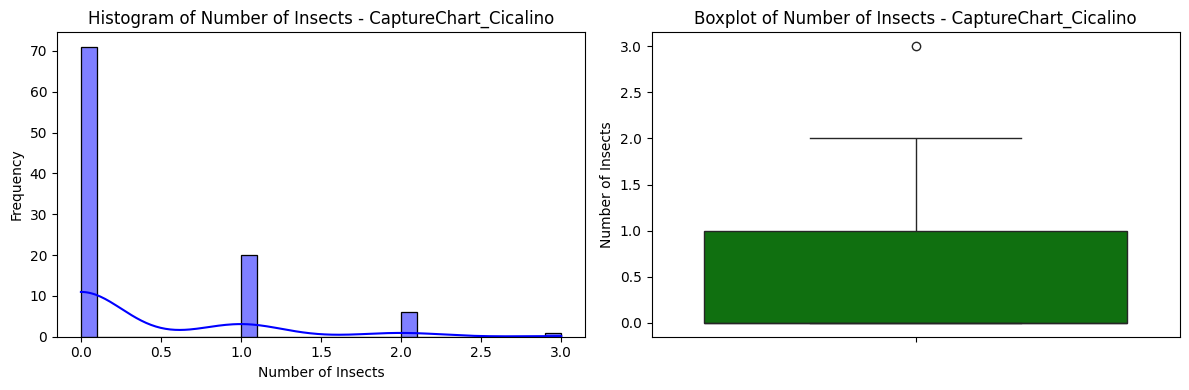

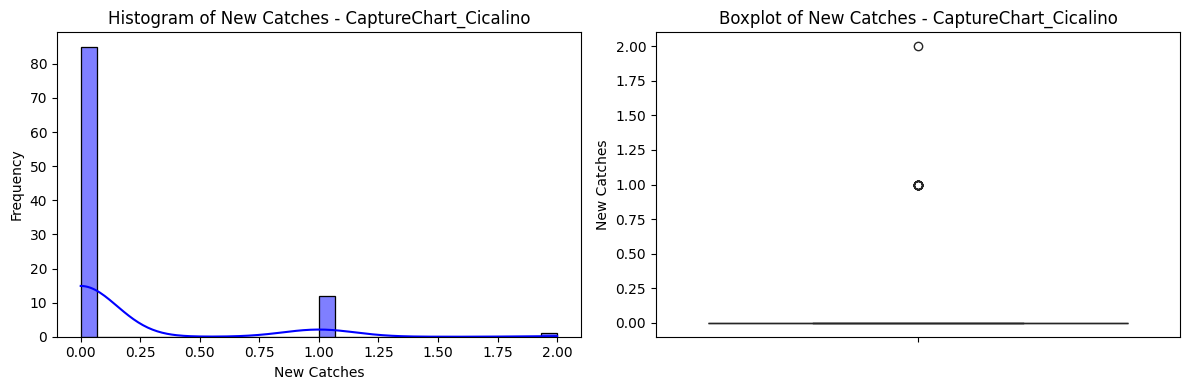

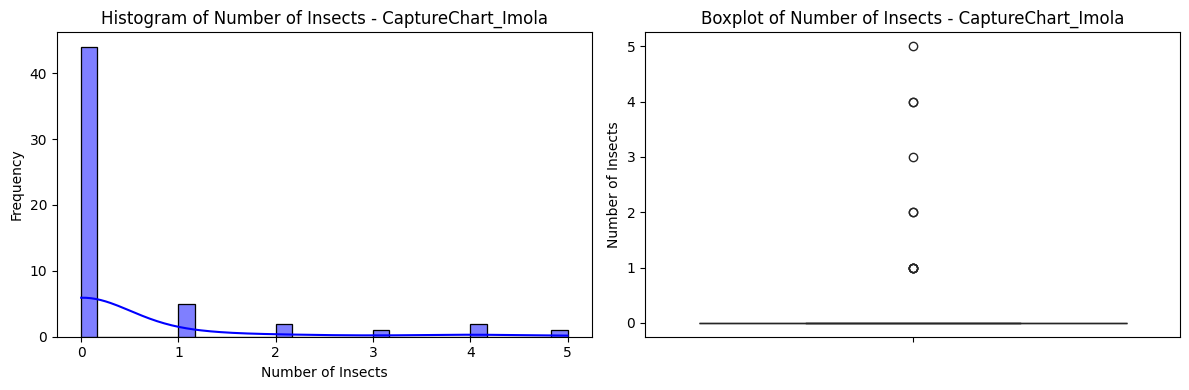

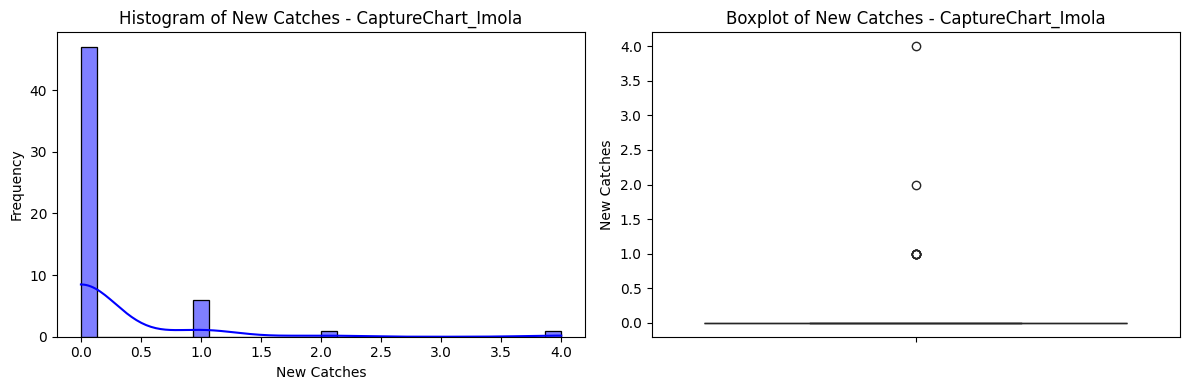

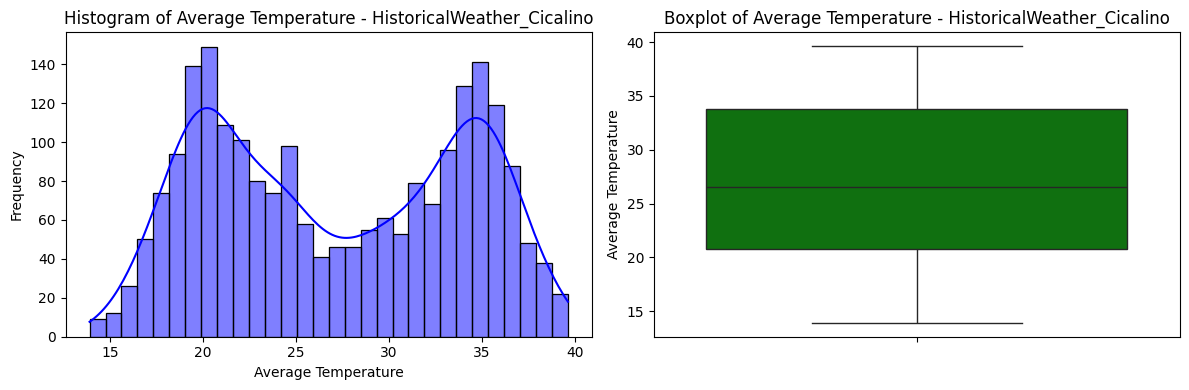

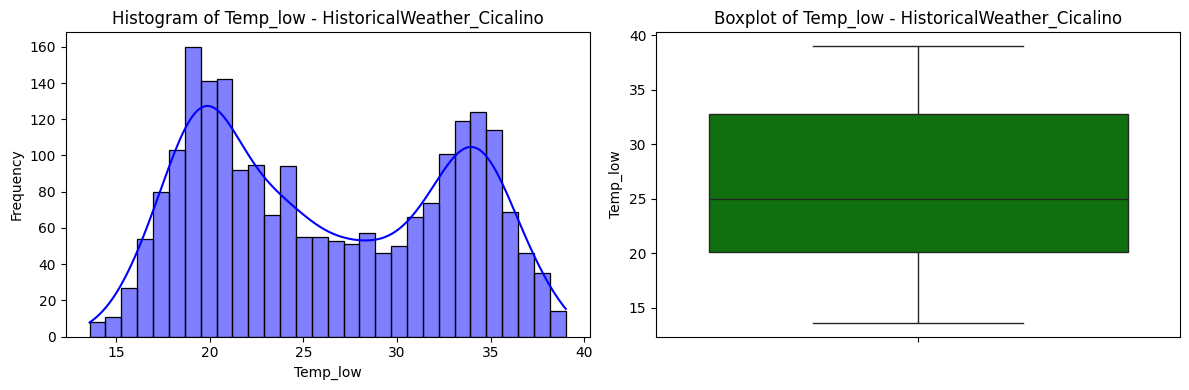

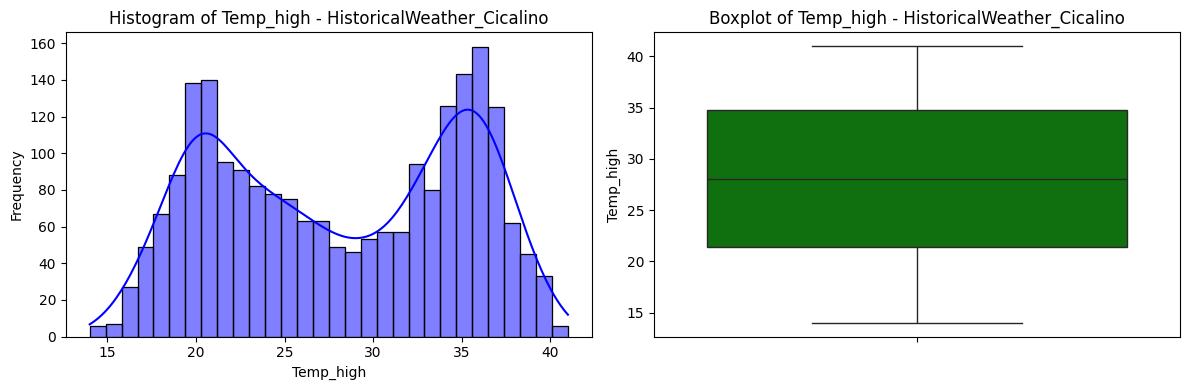

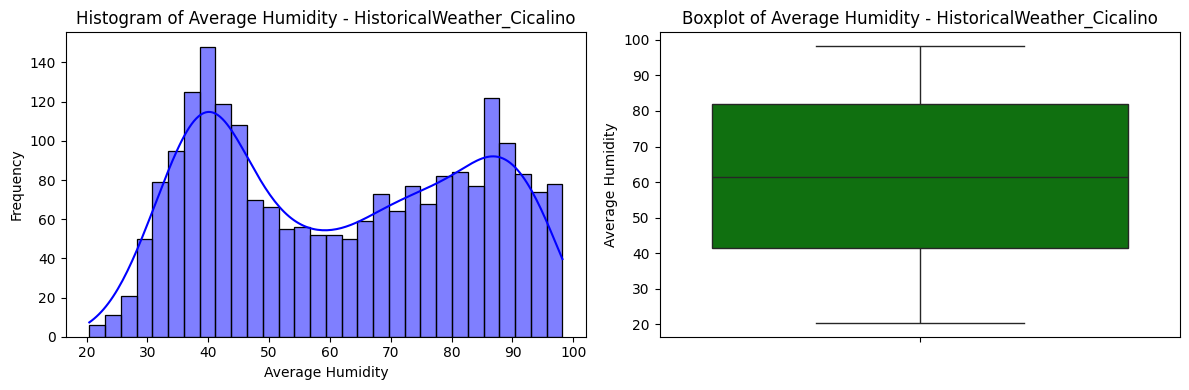

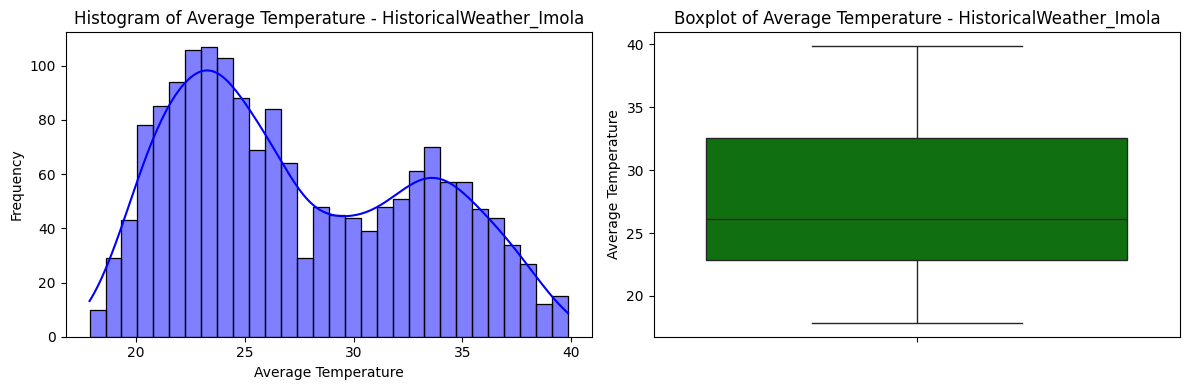

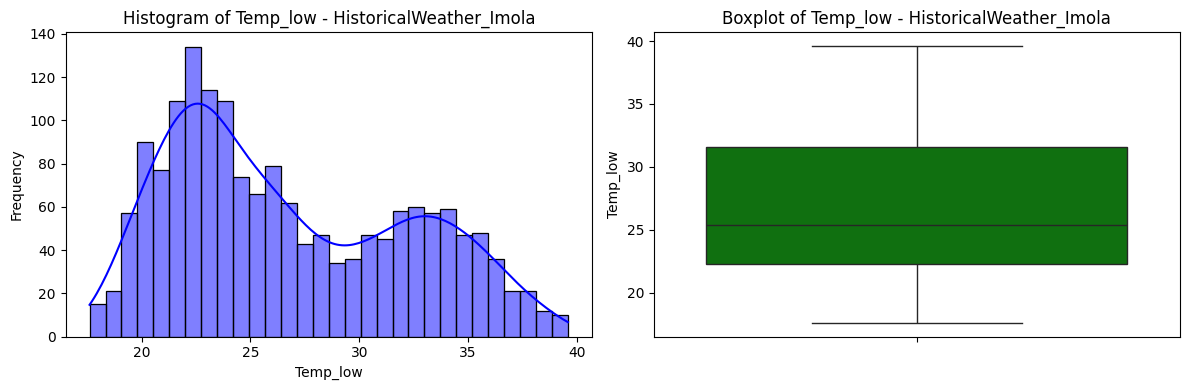

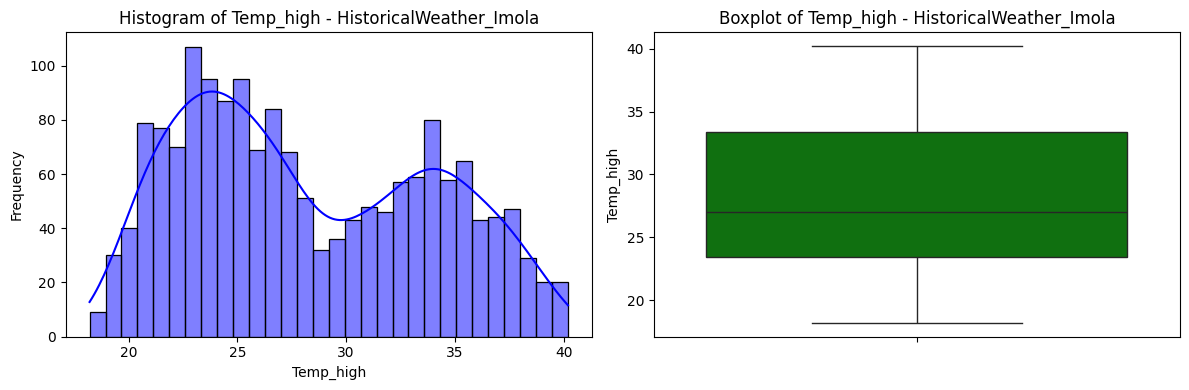

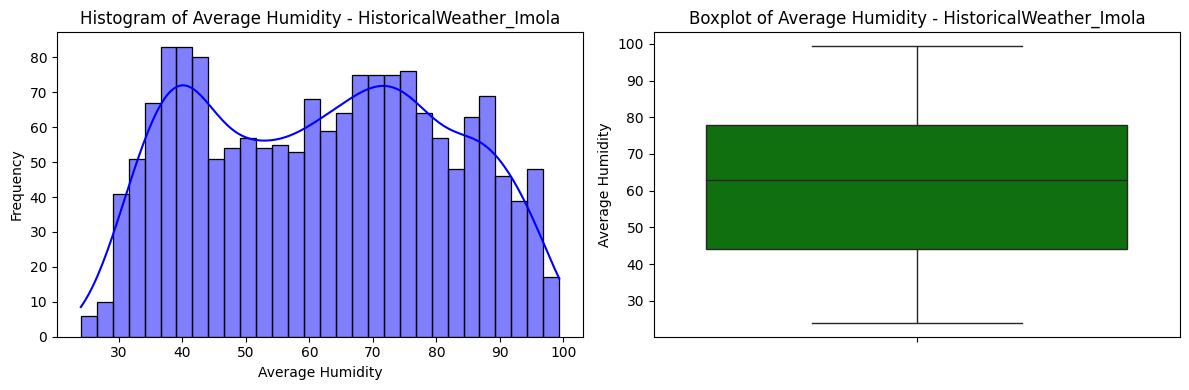

In [33]:
# Function to plot distributions
def plot_distributions(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True, color='blue')
        plt.title(f"Histogram of {col} - {dataset_name}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color='green')
        plt.title(f"Boxplot of {col} - {dataset_name}")

        plt.tight_layout()
        plt.show()

# Plot distributions for each dataset
plot_distributions(CaptureChart_Cicalino, "CaptureChart_Cicalino")
plot_distributions(CaptureChart_Imola, "CaptureChart_Imola")
plot_distributions(HistoricalWeather_Cicalino, "HistoricalWeather_Cicalino")
plot_distributions(HistoricalWeather_Imola, "HistoricalWeather_Imola")

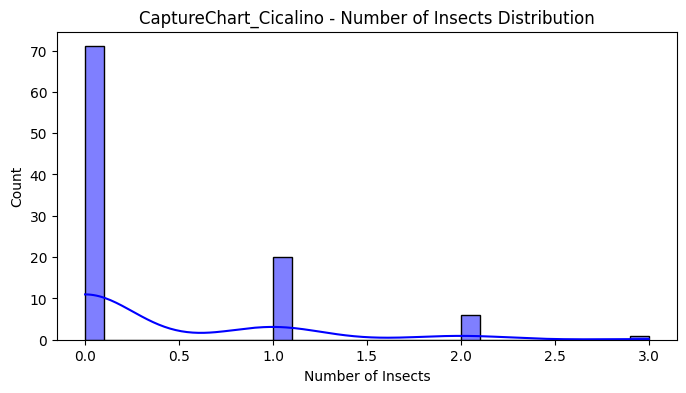

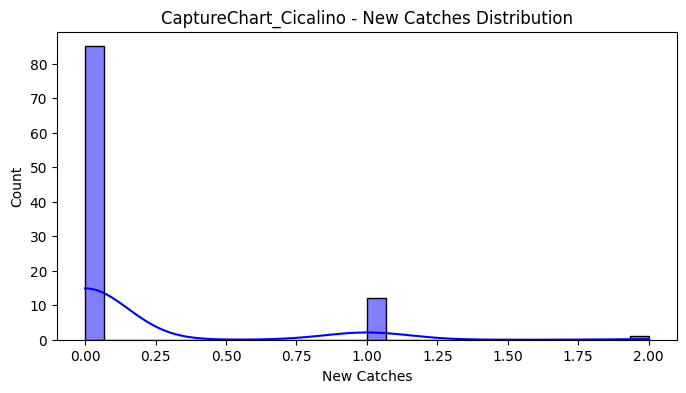

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


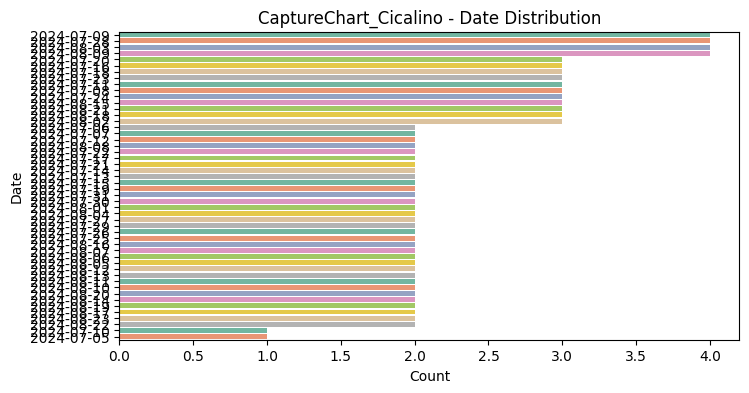

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


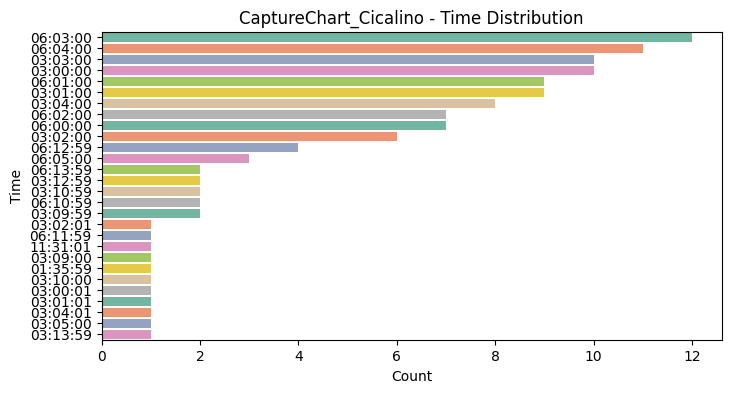

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


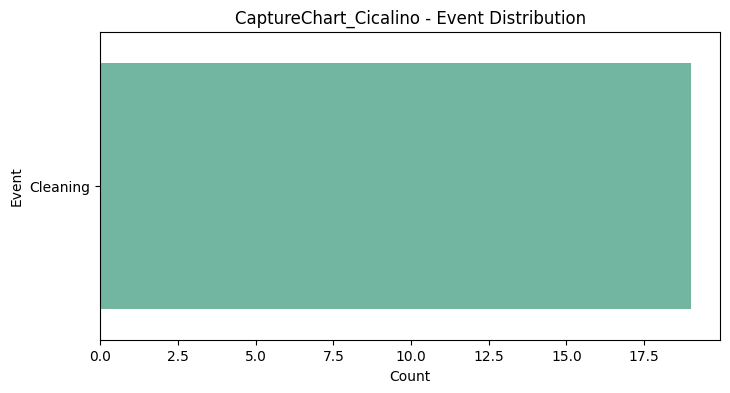

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


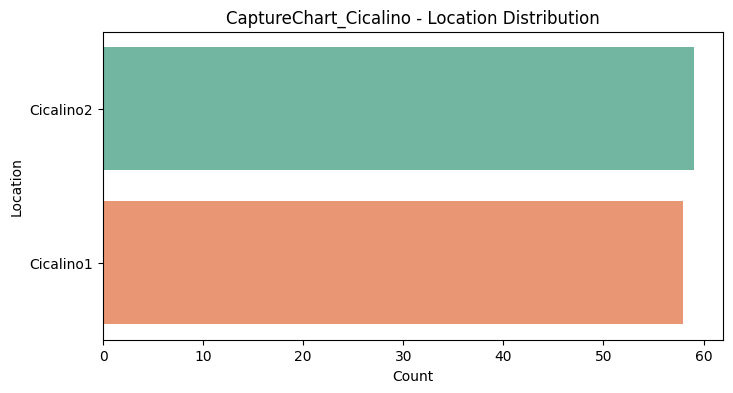

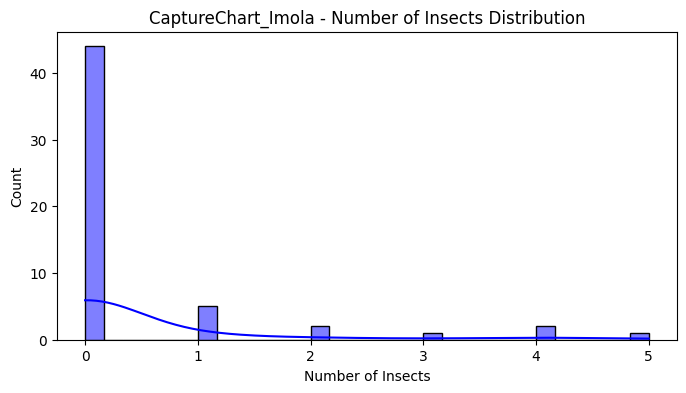

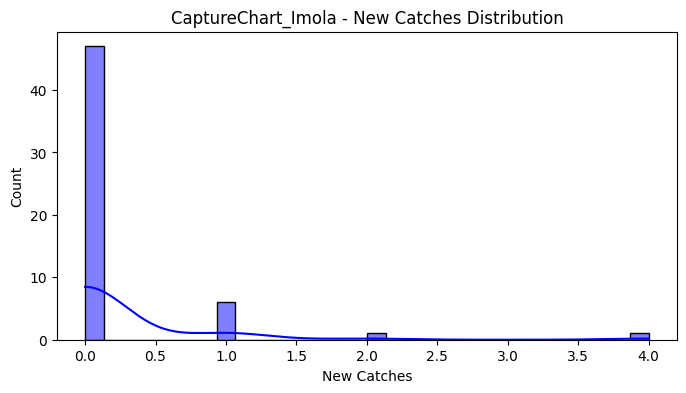

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


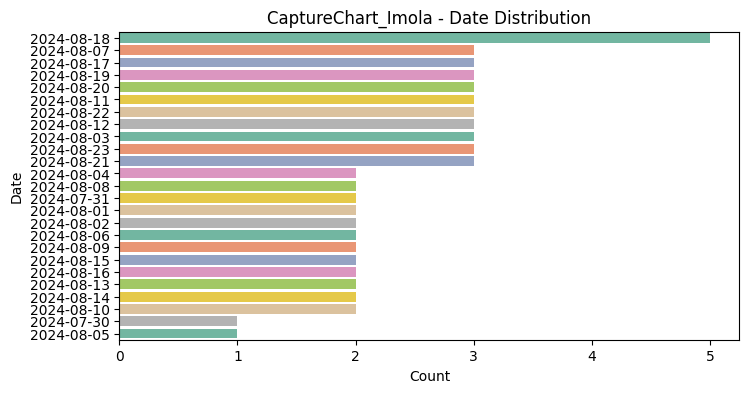

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


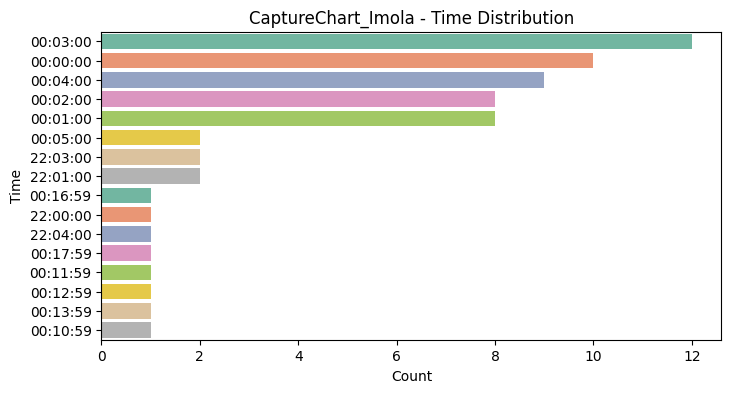

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


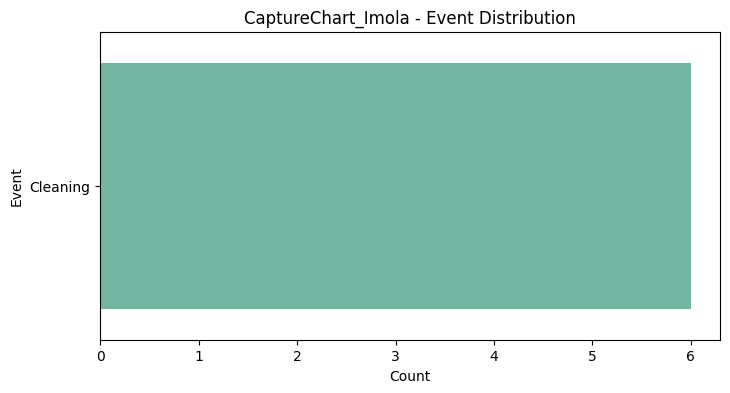

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


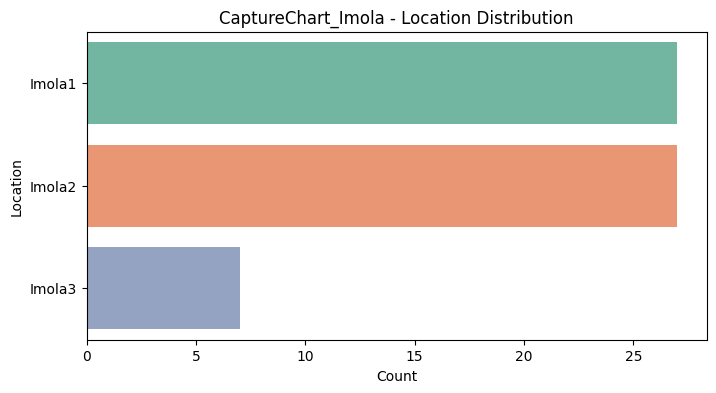

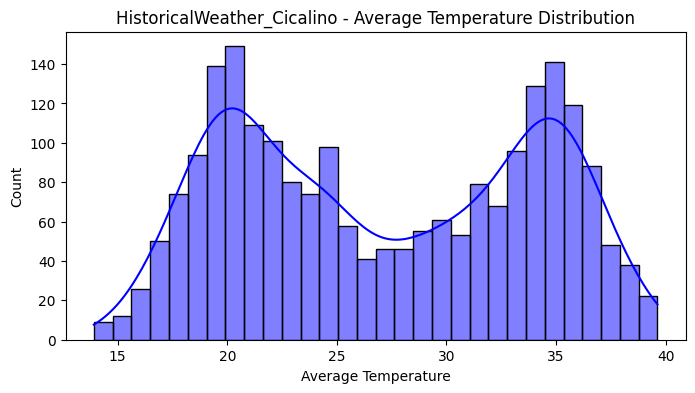

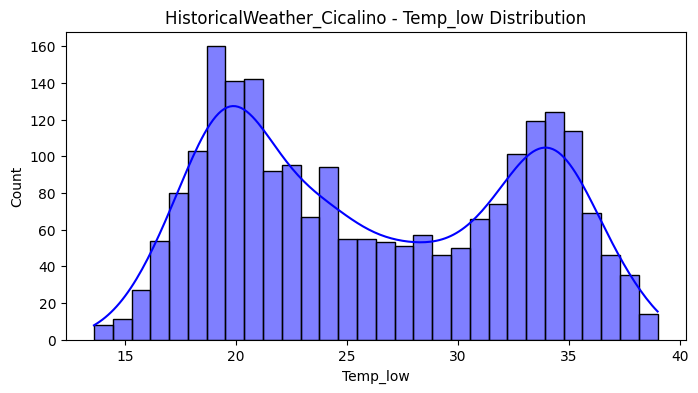

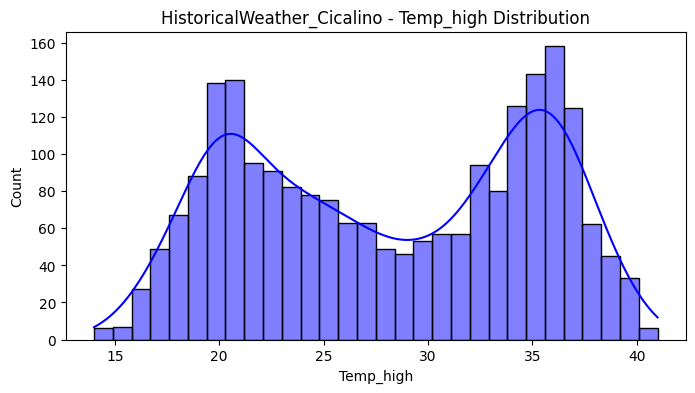

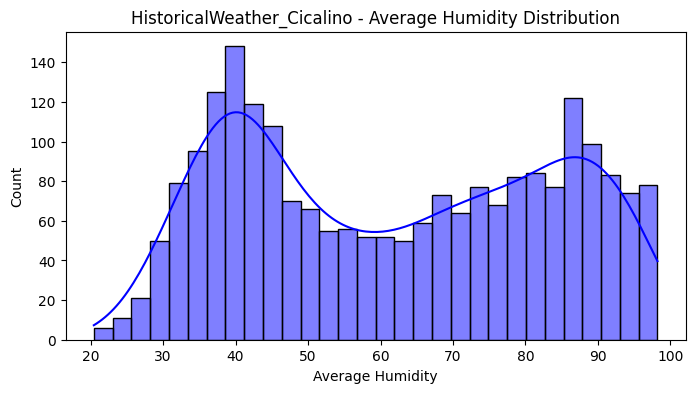

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


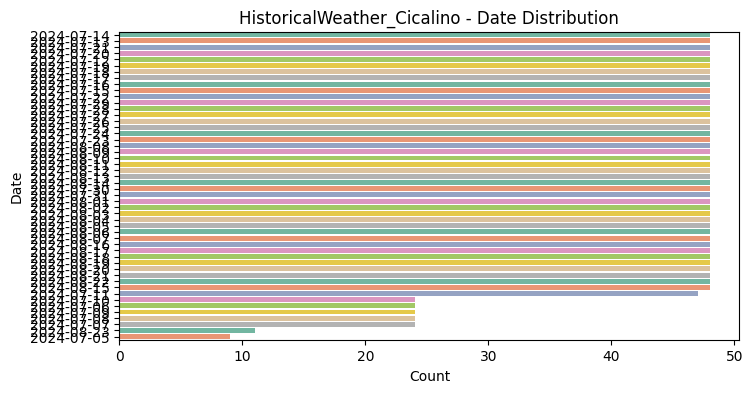

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


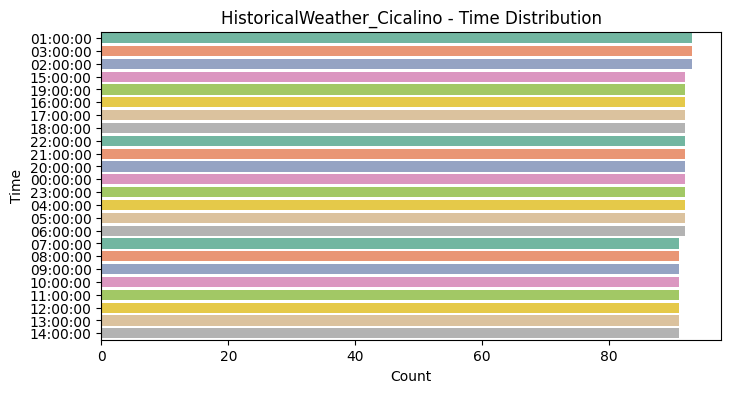

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


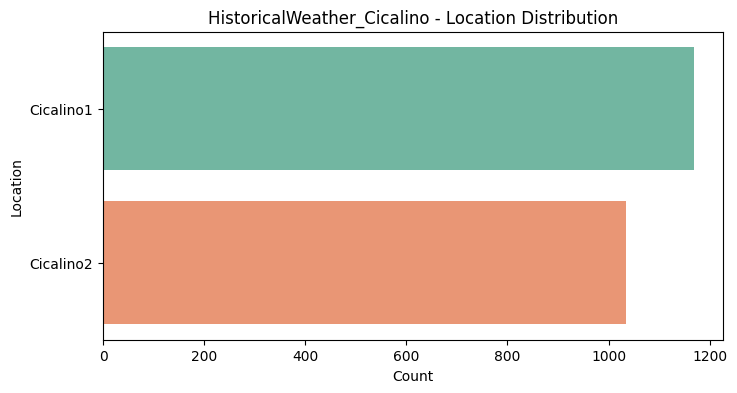

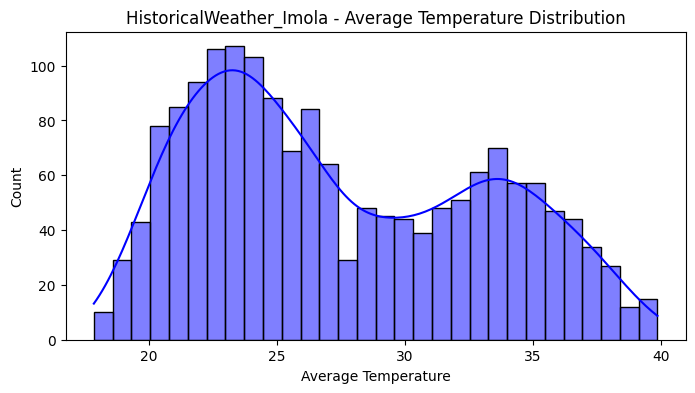

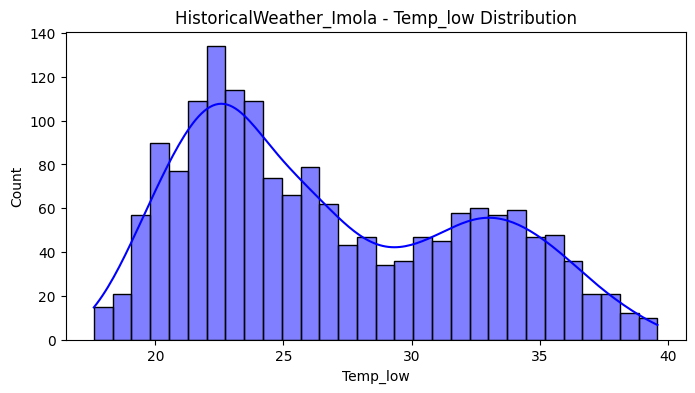

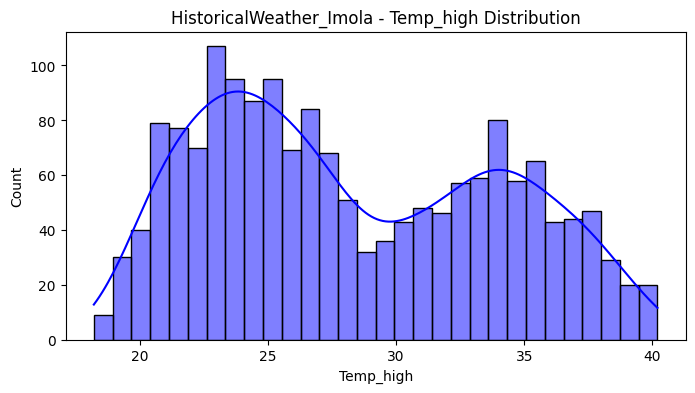

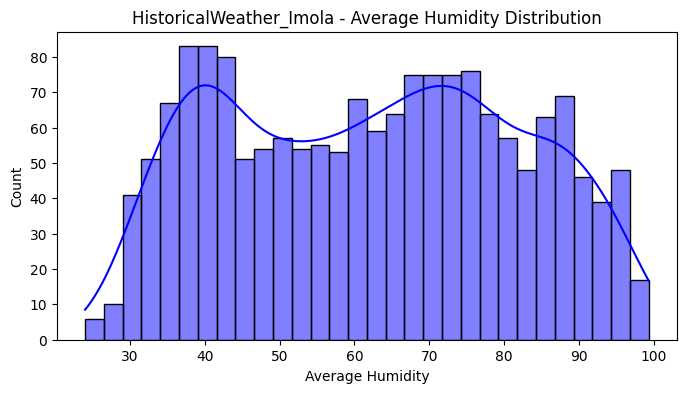

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


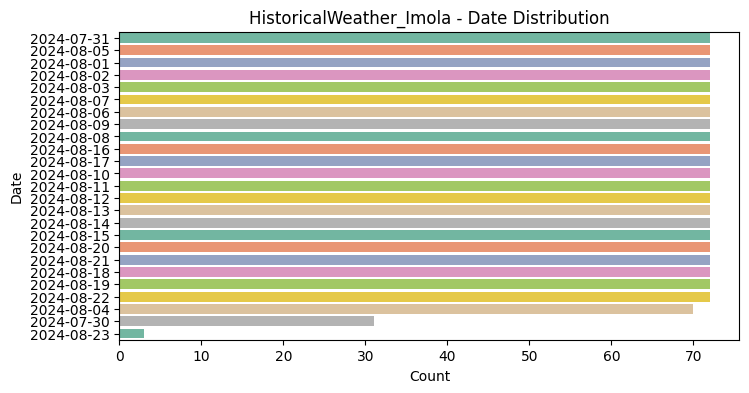

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


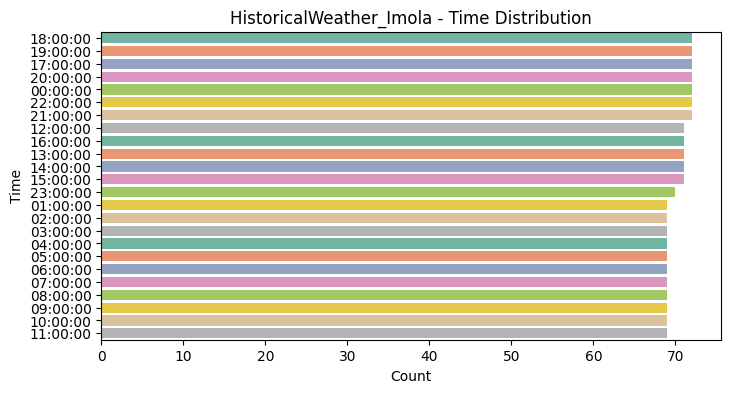

<ipython-input-35-21650bae0934>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")


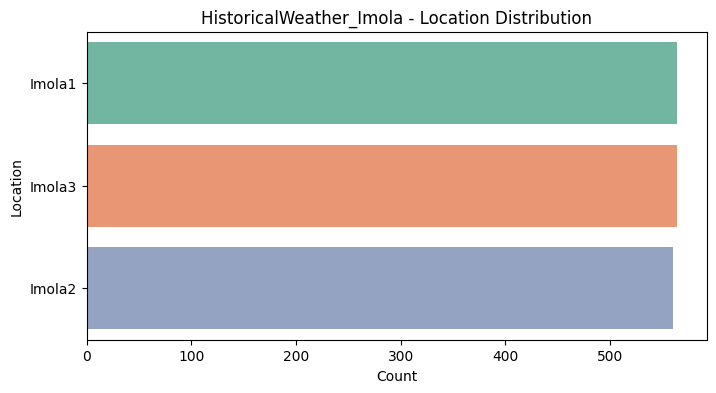

In [35]:
# Function to plot distributions
def plot_distributions(df, dataset_name):
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    # Plot numerical distributions
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), bins=30, kde=True, color="blue")
        plt.title(f"{dataset_name} - {col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

    # Plot categorical distributions
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette="Set2")
        plt.title(f"{dataset_name} - {col} Distribution")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

# Plot distributions for each dataset
plot_distributions(CaptureChart_Cicalino, "CaptureChart_Cicalino")
plot_distributions(CaptureChart_Imola, "CaptureChart_Imola")
plot_distributions(HistoricalWeather_Cicalino, "HistoricalWeather_Cicalino")
plot_distributions(HistoricalWeather_Imola, "HistoricalWeather_Imola")

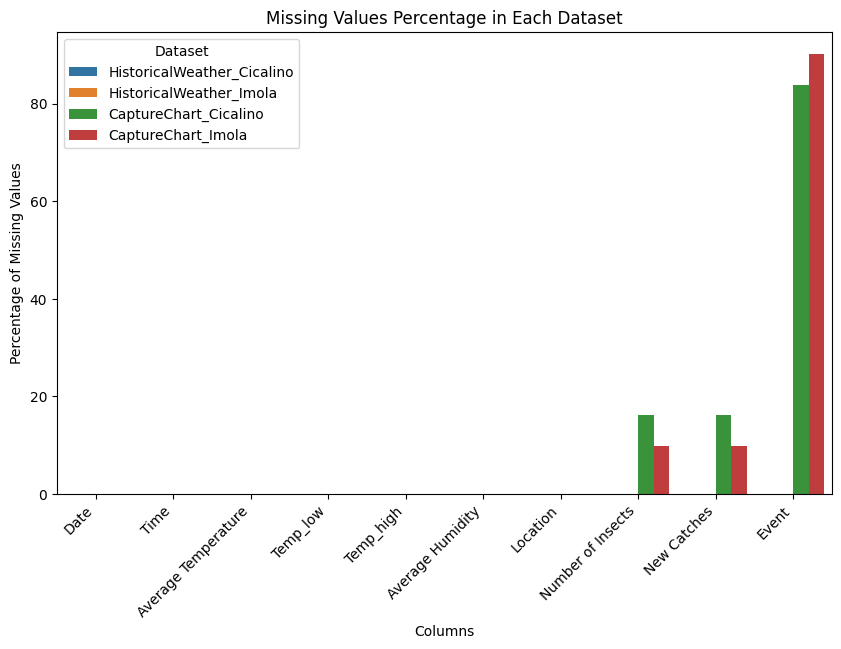

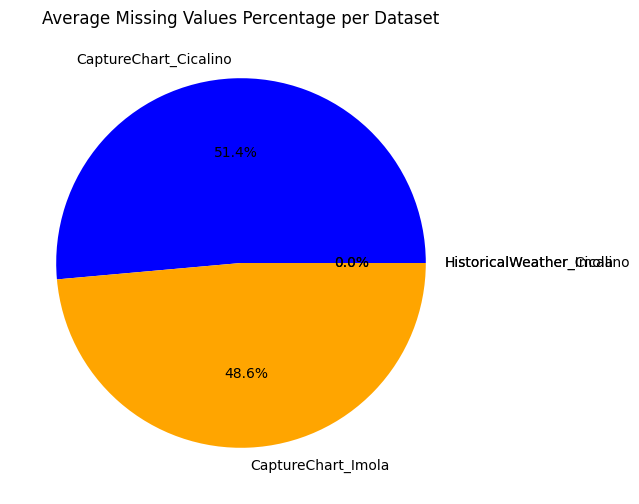

In [26]:
# Function to calculate missing values percentage
def missing_values(df, dataset_name):
    return pd.DataFrame({'Dataset': dataset_name, 'Column': df.columns, 'Missing %': df.isnull().mean() * 100})

# Calculate missing values for each dataset
missing_weather_cicalino = missing_values(HistoricalWeather_Cicalino, 'HistoricalWeather_Cicalino')
missing_weather_imola = missing_values(HistoricalWeather_Imola, 'HistoricalWeather_Imola')
missing_capture_cicalino = missing_values(CaptureChart_Cicalino, 'CaptureChart_Cicalino')
missing_capture_imola = missing_values(CaptureChart_Imola, 'CaptureChart_Imola')

# Combine all missing values
missing_data = pd.concat([missing_weather_cicalino, missing_weather_imola,
                          missing_capture_cicalino, missing_capture_imola])

# Plot missing values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing %', hue='Dataset', data=missing_data)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Percentage in Each Dataset')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.legend(title='Dataset')
plt.show()

print("\n")

# Plot missing values using a pie chart (aggregated by dataset)
missing_summary = missing_data.groupby('Dataset')['Missing %'].mean()

plt.figure(figsize=(6, 6))
plt.pie(missing_summary, labels=missing_summary.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'])
plt.title('Average Missing Values Percentage per Dataset')
plt.show()